In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import coefficients_computation as coeff_comp
import xp_visu_interpretability as visu
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('ytick', labelsize=20)
rc('xtick', labelsize=20)
rc("legend", fontsize=25)

We load the needed data ...

In [34]:
twopatterns_train_ts = pd.read_csv('./TwoPatterns_data/TwoPatterns_train_ts.txt',header=None)
twopatterns_y_train = twopatterns_train_ts.pop(0)
twopatterns_train_shaprep = pd.read_csv('./TwoPatterns_data/TwoPatterns_train_shaprep.csv')

, compute the group coefficient, distance coefficient and localization coefficient from the weights of our model.

In [3]:
# We compute the different coefficients of the shapelets
twopatterns_reglog_weights = np.genfromtxt('./TwoPatterns_data/TwoPatterns_reglog_weights.txt', delimiter=',')
twopatterns_coeff_reglog = pd.DataFrame(coeff_comp.compute_shapeletscoeff(twopatterns_reglog_weights),columns=['coeff_group', 'coeff_loc', 'coeff_dist'])
twopatterns_coeff_reglog['shapelet_id'] = [shap[:-3] for shap in list(twopatterns_train_shaprep)[::2]]

### Get the most important shapelet

Let's start by showing the 10 most important shapelets according the group coefficient which take into account both the distance feature and the localization feature of the shapelets.

In [4]:
twopatterns_coeff_reglog.sort_values('coeff_group',ascending=False)[:10]

,coeff_group,coeff_loc,coeff_dist,shapelet_id
861,0.014225,0.020246,0.019987,#491#78-20#
194,0.013997,0.010700,0.025867,#186#26-20#
1187,0.013652,0.005553,0.026733,#642#80-20#
926,0.013634,0.020877,0.017542,#528#55-20#
100,0.013033,0.015084,0.021259,#142#60-20#
1926,0.013031,0.012759,0.022724,#959#12-39#
203,0.012590,0.024250,0.006783,#191#26-58#
1036,0.012470,0.014156,0.020533,#575#11-20#
412,0.012425,0.020534,0.013996,#288#36-20#
1418,0.012413,0.014053,0.020465,#74#107-20#


We plot the most important shapelet and the time series in which it has been drawn.

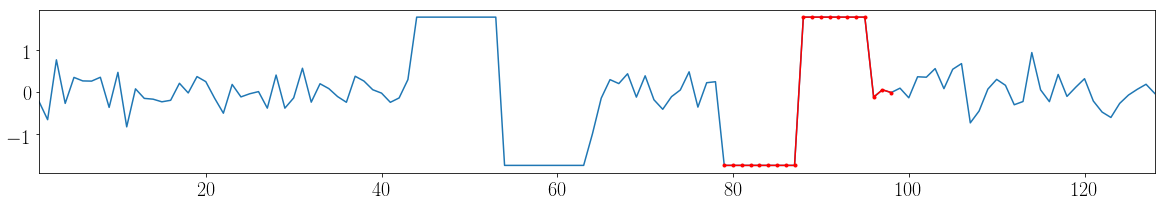

In [5]:
visu.plot_UCRdataset_shapelet('#491#78-20#',twopatterns_train_ts)

We can see it corresponds to the pattern B which is used to build the TwoPatterns dataset.

### Importance of the distance and the localization

Let's see the ranking of each component of the group coefficient which are distance coefficient and localization coefficient.

In [31]:
twp_dist_df = twopatterns_coeff_reglog.sort_values('coeff_dist',ascending=False).copy()
twp_dist_df['rank'] = list(range(1,len(twp_dist_df)+1))
print('distance coefficient rank {} / 2000' .format(twp_dist_df[twp_dist_df['shapelet_id'] == '#491#78-20#']['rank'].values[0]))

distance coefficient rank 14 / 2000


In [30]:
twp_loc_df = twopatterns_coeff_reglog.sort_values('coeff_loc',ascending=False).copy()
twp_loc_df['rank'] = list(range(1,len(twp_loc_df)+1))
print('localization coefficient rank {} / 2000' .format(twp_loc_df[twp_loc_df['shapelet_id'] == '#491#78-20#']['rank'].values[0]))

localization coefficient rank 4 / 2000


The most important shapelet according group coefficient is ranked $4^{th}$ for localization coefficient and $14^{th}$ for distance coefficient. Both these ranks are high in their respective ranking, that's means both the distance and the localization of this shapelet is important in our trained model.

### Explain the importance

Here the plot of the distribution of the distance and the localization for the most important shapelet in the TwoPatterns train dataset.

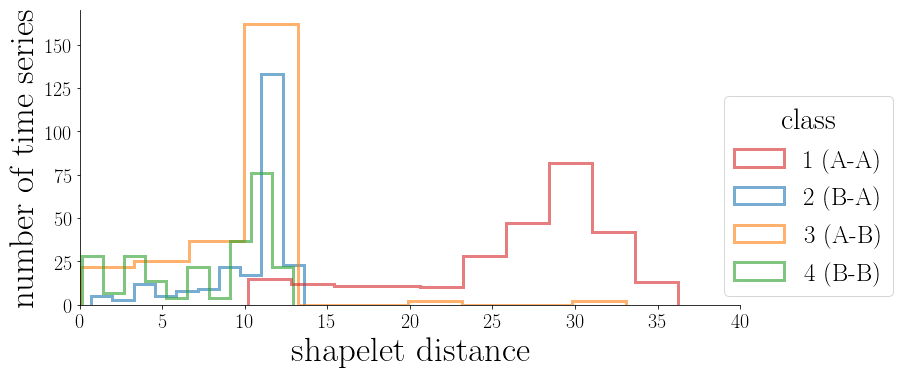

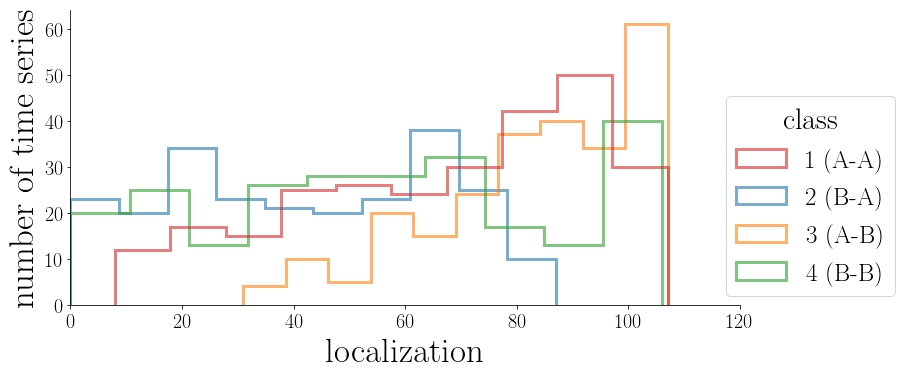

In [6]:
visu.plot_distribution_loc_dist_TwoPatterns('#491#78-20#',twopatterns_train_shaprep,twopatterns_y_train)

Let's see if the importance of the best shapelet makes sense. We will use the distribution of distance and localization of the shapelet in the data to develop our point.

#### Distance distribution
A low distance can be assimilated as the presence of the shapelet in the time series, and inversely an high distance as the absence of this shapelet.

In the distance distribution we observe:
- low value in the time series of the classes 2 (B-A) , 3  (A-B) and 4 (B-B), that's means pattern B is present
- high value in the time series of the class 1 (A-A), that's means pattern B is not present

#### Localization distribution
The values are actual localization of the shapelet in the time series.

In the localization distribution we observe:
- low-mid value in the time series of class 2 (B-A), that's means pattern B is not at the end where the pattern A is
- mid_high value in the time series of class 3 (A-B), that's means pattern B is not at the beginning where the pattern A is
- any value in the time series of classes 1 (A-A) and 4 (B-B), that's means pattern B match everywhere or not all

All these observations agreed with the dataset.

Now that we have a knowledge about distance and localization distribution of our shapelet. Let's see if both the features can be use to classify a time series and how.

For the distance feature, a high value allow to make a clear decsion on the class 1 otherwise we know only that we are not in class 1. 
For the localization feature, we have three options. If the localization is low we know that we are not in class 3. If the localization is in the middle, we have no information. If the localization is at the end we know that we are not in class 2.

If we combine both the distance and the localization features, it gives us only clear decision about the class 1 (if the distance value is high) otherwise only partial decision but which is still useful. This shows that both the features of this shapelet are useful and can explain why it has been ranked first.  

Furthemore partial information is not uncommon for shapelet-based classification. Usually it's pretty rare that only one shapelet is necessary to well-classified times series. In fact, the vast majority of shapelet-based methods use several shapelets to take decision. In our case the use of the localization can further reduce their number.